In [78]:
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from scipy.spatial import cKDTree
from scipy.spatial.distance import cdist
import time
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import sys
sys.path.append(r'C:\Users\tacuevas\Documents\GitHub\concorde')
from mda import normalize_df, unnormalize_df
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 14})
from matplotlib.offsetbox import AnchoredText

In [76]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_pickle(r'..\data\STORM\processed\STORM_NA_R2_In_pnt.pkl')
df.index = range(len(df))
df.head()

,year,month,yr_tc_number,time_step_at_min_press,time_step_at_min_distNC,lat_at_min_press,lon_at_min_press,lat_at_min_distNC,lon_at_min_distNC,min_press_at_min_distNC,...,rad_to_max_ws_at_min_distNC,rad_to_max_ws_at_min_press,max_cat,landfall,tc_id,distNC_at_min_distNC,distNC_at_min_press,trajectory_at_min_distNC,trajectory_at_min_press,mean_trajectory
0,0.0,11.0,4.0,25.0,33.0,29.6,-76.2,30.5,-79.3,977.2,...,74.080002,74.080002,3.0,1.0,4.0,571.303714,623.563360,284.036243,303.690068,306.734075
1,0.0,9.0,5.0,20.0,49.0,17.2,-61.5,33.2,-68.2,954.5,...,74.080002,74.080002,4.0,0.0,5.0,822.784684,2505.942098,21.801409,284.036243,347.184714
2,0.0,8.0,8.0,4.0,8.0,25.9,-83.4,27.4,-82.8,1000.5,...,55.560001,27.780001,0.0,0.0,8.0,1035.895766,1209.183408,NaN,18.434949,19.242162
3,0.0,8.0,8.0,4.0,9.0,25.9,-83.4,27.7,-82.5,1000.5,...,37.040001,37.040001,0.0,1.0,9.0,992.030799,1209.183408,NaN,18.434949,22.104144
4,0.0,10.0,10.0,2.0,3.0,29.1,-76.9,29.2,-77.2,1003.8,...,46.299999,46.299999,0.0,0.0,11.0,666.410514,676.494047,NaN,288.434949,276.144983


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,32329.0,4999.346191,2868.509410,0.000000e+00,2531.000000,4987.000000,7482.000000,9999.000000
month,32329.0,8.536484,1.190358,6.000000e+00,8.000000,9.000000,9.000000,11.000000
yr_tc_number,32329.0,5.361595,3.859338,0.000000e+00,2.000000,5.000000,8.000000,23.000000
time_step_at_min_press,32329.0,20.352996,20.356272,0.000000e+00,5.000000,14.000000,29.000000,222.000000
time_step_at_min_distNC,32329.0,29.644189,28.365637,0.000000e+00,7.000000,19.000000,47.000000,234.000000
lat_at_min_press,32329.0,26.758975,7.647857,6.900000e+00,21.200000,26.500000,31.400000,59.900000
lon_at_min_press,32329.0,-69.362139,10.673488,-9.890000e+01,-77.100000,-70.600000,-62.800000,-1.200000
lat_at_min_distNC,32329.0,30.395979,5.292787,2.010000e+01,26.400000,31.100000,34.600000,45.800000
lon_at_min_distNC,32329.0,-73.197278,6.705385,-8.490000e+01,-78.700000,-73.800000,-67.700000,-60.100000
min_press_at_min_distNC,32329.0,986.273661,20.102266,9.034000e+02,975.400000,996.200000,1000.900000,1012.000000


In [4]:
df.index = df.tc_id
dfs = df.drop(['year', 'month', 'yr_tc_number', 'tc_id', 'max_cat'], axis = 1)
dfs = dfs.fillna(0)

In [5]:
norm = normalize_df(dfs, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

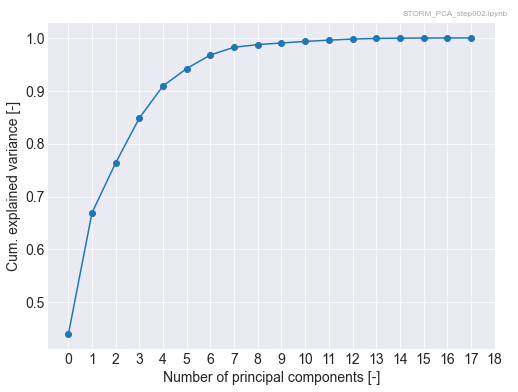

In [80]:
from sklearn.decomposition import PCA

pca = PCA().fit(norm.values)

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(pca.explained_variance_ratio_.cumsum(), 'o-')
ax.set_xticks(np.arange(0, len(dfs.columns) + 1, 1))
ax.set_ylabel('Cum. explained variance [-]')
ax.set_xlabel('Number of principal components [-]')

text = AnchoredText(nb_name, 'upper right',frameon = False, borderpad = -2, prop=dict(fontsize = 'xx-small', alpha = 0.4))
ax.add_artist(text)

In [28]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(norm.columns) + 1)],
    index=norm.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
time_step_at_min_press,-0.012744,0.017266,-0.022396,-0.007598,0.056416,0.001157,0.017088,0.018713,-0.032648,0.013592,0.008467,0.042622,-0.007573,0.001225,0.010586,0.015872,-0.000208,1.055369e-33
time_step_at_min_distNC,-0.032010,0.003552,-0.028645,-0.014390,0.075265,0.006325,0.018745,0.064010,-0.004521,0.008657,-0.003199,0.039404,-0.022436,0.000918,-0.009073,-0.015204,0.000303,-1.074559e-33
lat_at_min_press,0.041916,0.050413,0.004638,0.017918,-0.023854,-0.074111,-0.045340,-0.051742,-0.046214,0.014256,0.048067,0.007410,0.024573,0.002051,0.000966,-0.008573,0.000270,-3.756957e-34
lon_at_min_press,-0.000108,-0.010963,0.017896,0.010216,0.064455,0.012253,-0.050084,0.043477,0.029699,0.000218,0.022951,0.008529,0.026350,0.000608,-0.020570,0.009349,-0.000511,-1.132554e-34
lat_at_min_distNC,-0.006745,0.078560,-0.011080,0.013010,0.021501,-0.154142,-0.082347,0.050129,0.001375,0.003618,0.018412,-0.022683,-0.038784,-0.001150,-0.000556,0.003721,0.000004,-3.700335e-35


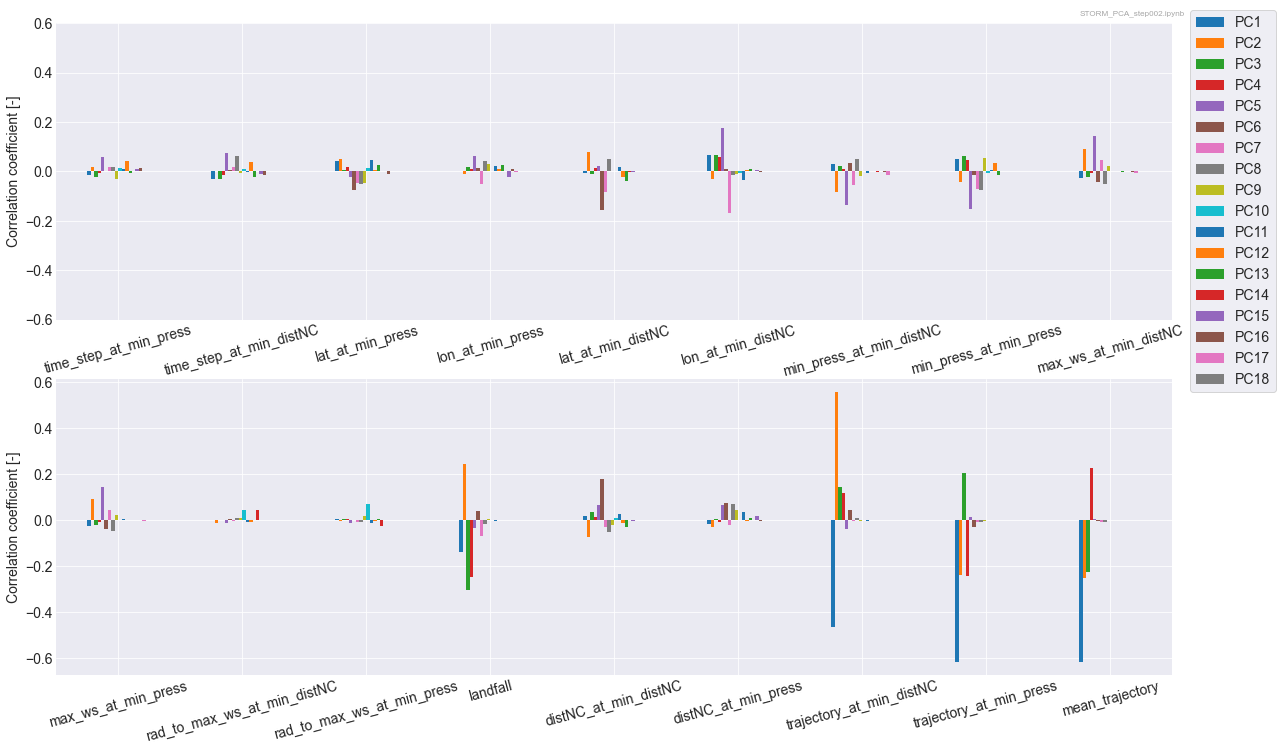

In [82]:
fig, ax = plt.subplots(figsize = (20, 12), nrows = 2)
d1 = loadings.iloc[:len(loadings)//2,:]
d1.plot.bar(ax = ax[0])
d2 = loadings.iloc[len(loadings)//2:,:]
d2.plot.bar(ax = ax[1], legend = False)

ax[0].legend(loc='center left', bbox_to_anchor = (1.01, 0.4), frameon = True)

ax[0].set_xticklabels(d1.index, rotation = 15);
ax[1].set_xticklabels(d2.index, rotation = 15);
ax[0].set_yticks(np.arange(-0.6, 0.8, 0.2));
ax[1].set_yticks(np.arange(-0.6, 0.8, 0.2));
ax[0].set_ylabel('Correlation coefficient [-]');
ax[1].set_ylabel('Correlation coefficient [-]');

text = AnchoredText(nb_name, 'upper right',frameon = False, borderpad = -2, prop=dict(fontsize = 'xx-small', alpha = 0.4))
ax[0].add_artist(text);